In [1]:
#EP PHYS 512 PS 6
#Question 3
#ratio-of-uniforms generator

In [2]:
import numpy as np
import matplotlib.pyplot as mpl

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

/home/elizabeth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/elizabeth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


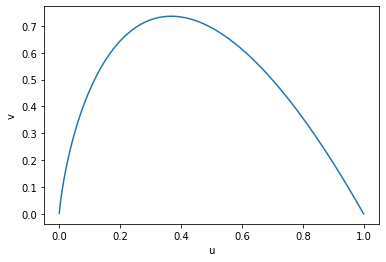

In [7]:
#we have u = exp(-v/(2u)) -> ln(u) = -v/(2u) -> v = -2u*ln(u)
#plot the shape of the region
u_edge = np.linspace(0, 1, 10000)
v_edge = -2*u_edge*(np.log(u_edge))

mpl.figure()
mpl.plot(u_edge, v_edge)
mpl.xlabel('u')
mpl.ylabel('v')
mpl.show()

Note that we restrict u/v from becoming negative, so the last border of the area above is the u axes (u/v cannot be negative, u is positive, therefore v must also be positive). If u goes from 0 to 1, as plotted above, (and how I generate it in my code), then v only ranges from 0 to about 0.8.

acceptance rate:  0.555147


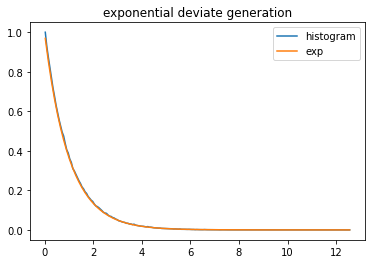

In [4]:
n = 1000000
u = np.random.rand(n)
v = 0.9*np.random.rand(n)

rou = v/u
accept = u < np.exp(-rou/2)

print('acceptance rate: ', sum(accept)/n)

yy = rou[accept]
vals, bins = np.histogram(yy, 200)
bb = 0.5*(bins[1:] + bins[:-1]) #centers of bins

mpl.figure()
mpl.plot(bb, vals/vals.max()) #normalized histogram
mpl.plot(bb, np.exp(-bb)) #exp
mpl.legend(['histogram', 'exp'])
mpl.title('exponential deviate generation')
mpl.show()

Here we again need two random number generations, one for u and one for v. So max efficiency if you boost your acceptance rate to 1 is 1/2. My acceptance rate is 0.55, so about 1 exponential deviate for 4 random number inputs.

Sidenote: We can see below how extending the range of v to 10 hurts the acceptance rate, and how squishing it to below 0.8 starts to cut out some of the necessary range as predicted earlier, and makes the shape weird.

acceptance rate:  0.050411


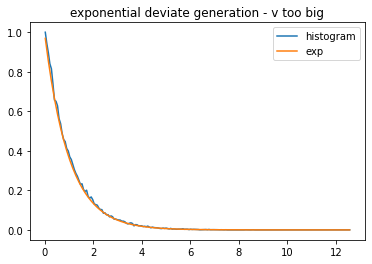

acceptance rate:  0.766148


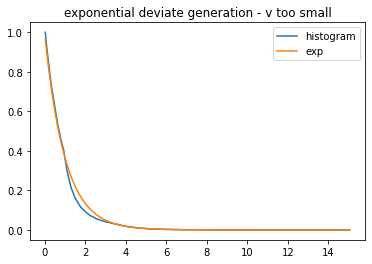

In [5]:
#EXPAND V out of necessary range, hurts acceptance rate
n = 1000000
u = np.random.rand(n)
v = 10*np.random.rand(n)

rou = v/u
accept = u < np.exp(-rou/2)

print('acceptance rate: ', sum(accept)/n)

yy = rou[accept]
vals, bins = np.histogram(yy, 200)
bb = 0.5*(bins[1:] + bins[:-1]) #centers of bins

mpl.figure()
mpl.plot(bb, vals/vals.max()) #normalized histogram
mpl.plot(bb, np.exp(-bb)) #exp
mpl.legend(['histogram', 'exp'])
mpl.title('exponential deviate generation - v too big')
mpl.show()

#SHRINK V TOO MUCH - cuts off necessary region, messes up shape
v = 0.6*np.random.rand(n)

rou = v/u
accept = u < np.exp(-rou/2)

print('acceptance rate: ', sum(accept)/n)

yy = rou[accept]
vals, bins = np.histogram(yy, 200)
bb = 0.5*(bins[1:] + bins[:-1]) #centers of bins

mpl.figure()
mpl.plot(bb, vals/vals.max()) #normalized histogram
mpl.plot(bb, np.exp(-bb)) #exp
mpl.legend(['histogram', 'exp'])
mpl.title('exponential deviate generation - v too small')
mpl.show()